# Importing libraries and dataset

In [2]:
# code to ensure that any changes made to the functions.py file are reflected in the Jupyter Notebook upon import
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from functions import cleaning, product_info_adjust

Importing plotly failed. Interactive plots will not work.


In [4]:
# Disabling a specific type of warning from Jupyter, that I know if mistaken for something else
pd.options.mode.chained_assignment = None 

**Dataset**:

Chen,Daqing. (2015). Online Retail. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/352/online+retail

In [5]:
file_path = '../data/Online Retail.xlsx'
df = pd.read_excel(file_path)

# Initial Exploration

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Missing values

**Notes for cleaning:**

- To drop rows with NaN at Description AND at CustomerID
- Drop rows with Price 0.0

**Then I will be left with NaN at CustomerID -> 132605 NaN values**

In [8]:
#  Missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.loc[df.Description.isna()] # 1454 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [10]:
df[df.Description.isna() & df.CustomerID.isna()] # 1454 row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [11]:
df[df.UnitPrice == 0.0] # will drop these rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


## Duplicated values

**Notes for cleaning:**

- Drop duplicated rows

In [11]:
df.duplicated().sum() # Duplicated rows

5268

## Dtypes

Types of columns appear to be correct.

In [12]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## Outliers & Negative values

**Notes for cleaning:**

- There seem to be outliers in columns 'Quantity' and 'UnitPrice'. To check them and if appropriate to remove them with statistical methods.

**Notes:**

- Stockcode with letters ['M', 'D', 'S', 'B', 'm'] and more -> Adding everything that is not stock, to StockCode OTHER
- if InvoiceNo code starts with letter 'c', it indicates a cancellation - TO BE DROPPED



*TO BE EXPLORED outliers at Quantity and Unit Price*

<Axes: ylabel='Quantity'>

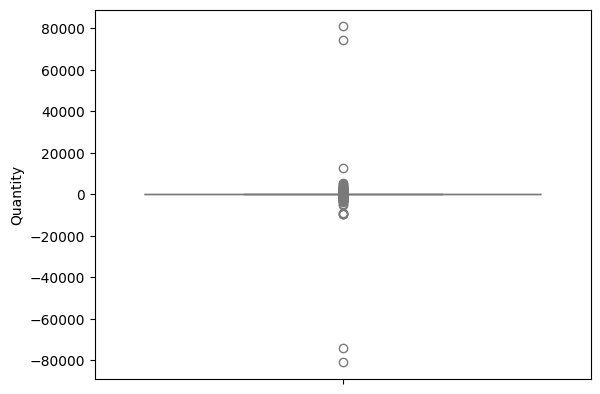

In [13]:
sns.boxplot(data = df['Quantity'], color="lightblue") # there are outliers

<Axes: ylabel='UnitPrice'>

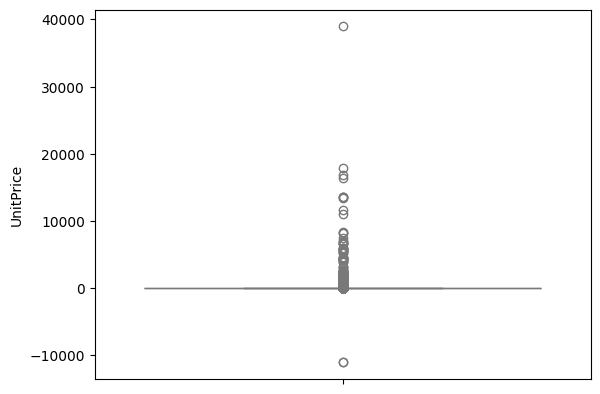

In [14]:
sns.boxplot(data = df['UnitPrice'], color="lightblue") # there are outliers

In [76]:
# These are tthe two values that are more weird
df.sort_values(by='Quantity', ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
523406,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
59649,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.25,12346,United Kingdom
408240,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.29,12901,United Kingdom
199399,554868,22197,POPCORN HOLDER,4300,2011-05-27 10:52:00,0.85,13135,United Kingdom
94208,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,1.25,18087,United Kingdom
262196,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.18,14609,United Kingdom
50902,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,0.79,15749,United Kingdom
155191,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,0.79,15749,United Kingdom
420064,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.42,16308,United Kingdom
4784,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.29,16754,United Kingdom


In [16]:
df.select_dtypes('number').describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
df[df.InvoiceNo == 567507].UnitPrice.sum()

2192.5100000000007

In [18]:
df[(df.InvoiceNo == 567507) & (df.StockCode =='SHIPPING')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [19]:
# it looks that th 60 top unit prices are either Shipping or NaN
# I will drop the NaN (they are from the MANUAL code) because they don't offer any clear insights
df.sort_values(by='UnitPrice', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom


In [20]:
df.sort_values(by='Quantity', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom


In [21]:
# I see that there are also the shipping costs with SrockCode 'POST' and 'DOT'
df[df.Description.str.contains('POSTAGE', na=False)].head()
# For clarity I will replace the code and description with shipping

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom


In [22]:
df[df.InvoiceNo == 537237]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
10220,537237,15036,ASSORTED COLOURS SILK FAN,2,2010-12-06 09:58:00,1.28,NaN,United Kingdom
10221,537237,15056N,EDWARDIAN PARASOL NATURAL,1,2010-12-06 09:58:00,12.72,NaN,United Kingdom
10222,537237,16218,CARTOON PENCIL SHARPENERS,1,2010-12-06 09:58:00,2.13,NaN,United Kingdom
10223,537237,16238,PARTY TIME PENCIL ERASERS,5,2010-12-06 09:58:00,0.43,NaN,United Kingdom
10224,537237,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,3,2010-12-06 09:58:00,0.84,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
10812,537237,DOT,DOTCOM POSTAGE,1,2010-12-06 09:58:00,863.74,NaN,United Kingdom
10813,537237,84712B,PINK JEWELLED PHOTO FRAME,3,2010-12-06 09:58:00,7.95,NaN,United Kingdom
10814,537237,22862,LOVE HEART NAPKIN BOX,2,2010-12-06 09:58:00,4.25,NaN,United Kingdom
10815,537237,22766,PHOTO FRAME CORNICE,2,2010-12-06 09:58:00,2.95,NaN,United Kingdom


In [23]:
# df[df.StockCode == 'DOT'].CustomerID.isna().sum() #694
df[df.StockCode == 'DOT'].CustomerID.unique()

array([   nan, 14096.])

In [24]:
df[df.CustomerID == 14096]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
317502,564764,16207B,PINK HEART RED HANDBAG,1,2011-08-30 10:49:00,2.46,14096.0,United Kingdom
317503,564764,16225,RATTLE SNAKE EGGS,1,2011-08-30 10:49:00,3.29,14096.0,United Kingdom
317504,564764,16254,TRANSPARENT ACRYLIC TAPE DISPENSER,1,2011-08-30 10:49:00,1.63,14096.0,United Kingdom
317505,564764,84249A,"GREETING CARD,SQUARE, DOUGHNUTS",1,2011-08-30 10:49:00,0.83,14096.0,United Kingdom
317506,564764,84659A,WHITE TRAVEL ALARM CLOCK,2,2011-08-30 10:49:00,1.23,14096.0,United Kingdom
...,...,...,...,...,...,...,...,...
528083,580727,10135,COLOURING PENCILS BROWN TUBE,8,2011-12-05 17:17:00,2.46,14096.0,United Kingdom
528084,580727,11001,ASSTD DESIGN RACING CAR PEN,3,2011-12-05 17:17:00,3.29,14096.0,United Kingdom
528085,580727,15044A,PINK PAPER PARASOL,1,2011-12-05 17:17:00,5.79,14096.0,United Kingdom
528086,580727,15056BL,EDWARDIAN PARASOL BLACK,1,2011-12-05 17:17:00,12.46,14096.0,United Kingdom


In [25]:
df[df.Description.str.contains('POSTAGE', na=False)].StockCode.value_counts()

StockCode
POST    1252
DOT      709
Name: count, dtype: int64

In [26]:
# There are two entries with amazon fee, and these invoices contain only that item
# Will drop them 
df[df.Description.str.contains('AMAZON', na=False)].head()
# df[df.InvoiceNo == 537632]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom


In [27]:
df[(df.Quantity<0)] # 10624 rows, THESE ARE CANCELLATIONS

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [28]:
df[(df.Quantity<0) & df.InvoiceNo.str.startswith('C')] # cancellations

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [29]:
df[(df.Quantity<0) & (~df.InvoiceNo.astype(str).str.startswith('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [30]:
df[(df.Quantity<0) & (~df.InvoiceNo.astype(str).str.startswith('C'))].Quantity.describe()
# I see from this, that what has the above conditions, has negative Quantity

count    1336.000000
mean     -154.907934
std       588.292456
min     -9600.000000
25%       -84.000000
50%       -30.000000
75%        -8.000000
max        -1.000000
Name: Quantity, dtype: float64

In [31]:
df[df.InvoiceNo == '581568']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [32]:
df[df.CustomerID == 17548.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548.0,United Kingdom
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom


In [33]:
df[df.CustomerID == 17315.0].tail(10) 
# okay, from this I understand that the cancelled items appear only to the line with orders starting with C

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
537792,581345,72800B,4 PURPLE FLOCK DINNER CANDLES,12,2011-12-08 12:15:00,0.79,17315.0,United Kingdom
537793,581345,22488,NATURAL SLATE RECTANGLE CHALKBOARD,6,2011-12-08 12:15:00,1.65,17315.0,United Kingdom
537794,581345,85059,FRENCH ENAMEL WATER BASIN,2,2011-12-08 12:15:00,3.75,17315.0,United Kingdom
537795,581345,22495,SET OF 2 ROUND TINS CAMEMBERT,2,2011-12-08 12:15:00,0.79,17315.0,United Kingdom
537796,581345,22500,SET OF 2 TINS JARDIN DE PROVENCE,2,2011-12-08 12:15:00,1.25,17315.0,United Kingdom
537797,581345,22151,PLACE SETTING WHITE HEART,24,2011-12-08 12:15:00,0.42,17315.0,United Kingdom
537798,581345,22698,PINK REGENCY TEACUP AND SAUCER,9,2011-12-08 12:15:00,2.95,17315.0,United Kingdom
537799,581345,22699,ROSES REGENCY TEACUP AND SAUCER,10,2011-12-08 12:15:00,2.95,17315.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [34]:
df[(df.UnitPrice<0)] # negative price is adjusted bad debt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [35]:
df[(df.InvoiceNo == 'A563186')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [36]:
df[(df.UnitPrice == 11062.06)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


In [37]:
# Checking product codes with only letters
df[df['StockCode'].apply(lambda x: str(x).isalpha() if not pd.isna(x) else False)].StockCode.unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [38]:
# Checking all the product codes that contain letters, to make sure that anything not a procust goes to OTHER code
pd.set_option('display.max_seq_items', None)
print(sorted(df[df['StockCode'].str.contains(r'[a-zA-Z]', na=False)].StockCode.unique().tolist()))

['10123C', '10123G', '10124A', '10124G', '15044A', '15044B', '15044C', '15044D', '15056BL', '15056N', '15056P', '15056bl', '15056n', '15056p', '15058A', '15058B', '15058C', '15060B', '15060b', '16020C', '16151A', '16156L', '16156S', '16161G', '16161M', '16161P', '16161U', '16162L', '16162M', '16168M', '16169E', '16169K', '16169M', '16169N', '16169P', '16202A', '16202B', '16202E', '16206B', '16207A', '16207B', '16244B', '16248B', '16258A', '17007B', '17011A', '17011F', '17012A', '17012B', '17012C', '17012D', '17012E', '17012F', '17013D', '17014A', '17028J', '17084A', '17084J', '17084N', '17084P', '17084R', '17090A', '17090D', '17091A', '17091J', '17107D', '17109D', '17129F', '17136A', '17164B', '17165D', '17191A', '18094C', '18097A', '18097C', '18098C', '18098c', '35001G', '35001W', '35004B', '35004C', '35004G', '35004P', '35095A', '35095B', '35271S', '35471D', '35591T', '35592T', '35597A', '35597B', '35597D', '35598A', '35598B', '35598C', '35598D', '35599B', '35599D', '35600A', '35603B

In [39]:
df[df.StockCode.str.len() == 1].StockCode.value_counts().index # I need to look into that

Index(['M', 'D', 'S', 'B', 'm'], dtype='object', name='StockCode')

In [40]:
df[df.StockCode == 'S'] # 'SAMPLES'
df[df.StockCode == 'M'] # 'Manual'
df[df.StockCode == 'D'] # 'Discount'
df[df.StockCode == 'B'] # 'Adjust bad debt'
df[df.StockCode == 'm'] # 'Manual'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40383,539736,m,Manual,1,2010-12-21 15:18:00,2.55,NaN,United Kingdom


In [41]:
df[df.StockCode == 'DCGS0076']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
21326,538071,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-12-09 14:09:00,16.13,NaN,United Kingdom
39313,539631,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-12-20 15:03:00,16.13,NaN,United Kingdom


## Formatting

**Notes for cleaning:**

- country EIRE refers to Ireland - to change

In [42]:
df[df.Country.str.contains('EIRE')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE
...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE
539152,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE
539153,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE
539154,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE


In [43]:
df.Country.nunique()

38

In [44]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [45]:
df[df.Country == 'European Community'].shape[0] # only connected to 1 client

61

In [46]:
df[df.Country == 'Unspecified']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24,2011-11-24 14:55:00,1.25,NaN,Unspecified
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12,2011-11-24 14:55:00,1.25,NaN,Unspecified
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12,2011-11-24 14:55:00,1.65,NaN,Unspecified
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24,2011-11-24 14:55:00,0.55,NaN,Unspecified


# Cleaning #1

In [47]:
df = cleaning(df)

# Multiple prices for StockCodes/Descriptions

I do see that sometimes for the same code there are multiple descriptions, and multiple prices.

From the analysis, I am spotting one the ones that have high ranges and std, and I am examining them.
My conclusions are that:
- Sometimes it is just a small insignificant change in the name.
- In one instance it was probably referring to a bundle of items, usually sold seperately -> have added a new stockcode to these.
- In some instances with the highest price differences, one price significantly outweighed the others in frequency. I interpret this as price adjustments made for marketing purposes. While there might be a few exceptions, the volume of data suggests minimal impact on the overall analysis. In those cases, I opt to retain the most common price (mode) for analytical purposes.

In [48]:
# Saving clean dataset
df.StockCode.nunique() # 3916
df.Description.nunique() # 4026
# they don't match for some reason, why?

4026

In [49]:
# from the following I see that 220 stockCodes have more than 1 descriptions
(df.groupby('StockCode')['Description'].nunique().sort_values(ascending=False).values >1 ).sum()

# I want to make a list of the stock codes that have more than 1 descriptions
grouped_codes = df.groupby('StockCode')['Description'].nunique().reset_index()
#list_codes = grouped_codes[grouped_codes.Description >1].StockCode.tolist()

In [50]:
df.groupby('StockCode')['Description'].nunique().sort_values(ascending=False)

StockCode
OTHER           7
23236           4
23196           4
23244           3
23131           3
               ..
22492           1
22493           1
22494           1
22495           1
gift_0001_50    1
Name: Description, Length: 3915, dtype: int64

In [51]:
# I would drop the following, but I see that their price=0, so they will anyway be dropped because of that
df[df.Description.str.contains('|'.join(['found', 'wrongly', 'marked']),flags=re.IGNORECASE, na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [52]:
df[df.StockCode == 23236].groupby('Description')['UnitPrice'].mean()

Description
DOILEY BISCUIT TIN             2.859231
DOILEY STORAGE TIN             3.103008
STORAGE TIN VINTAGE DOILEY     4.340000
STORAGE TIN VINTAGE DOILY      3.410312
Name: UnitPrice, dtype: float64

In [53]:
df[df.StockCode == 23236].groupby('Description')['UnitPrice'].agg(lambda x: x.max() - x.min())

Description
DOILEY BISCUIT TIN             0.4
DOILEY STORAGE TIN             3.3
STORAGE TIN VINTAGE DOILEY     2.9
STORAGE TIN VINTAGE DOILY      3.3
Name: UnitPrice, dtype: float64

In [54]:
df[df.StockCode == 23196].groupby('Description')['UnitPrice'].mean()

Description
LEAVES MAGNETIC  SHOPPING LIST        1.450000
RETO LEAVES MAGNETIC SHOPPING LIST    1.450000
RETRO LEAVES MAGNETIC NOTEPAD         1.537619
VINTAGE LEAF MAGNETIC NOTEPAD         1.822230
Name: UnitPrice, dtype: float64

In [55]:
df[df.StockCode == 23244].groupby('Description')['UnitPrice'].mean()

Description
CANNISTER VINTAGE LEAF DESIGN     1.950000
ROUND STORAGE TIN VINTAGE LEAF    2.101845
STORAGE TIN VINTAGE LEAF          1.950000
Name: UnitPrice, dtype: float64

In [56]:
test = df[df.StockCode != 'OTHER']

In [57]:
test.groupby('StockCode')['UnitPrice'].std().sort_values(ascending=False).head(20)

StockCode
22656     66.039761
22655     62.136568
22826     48.621234
22502     42.058484
22833     25.435572
21769     19.219162
23064     17.964517
21473     17.459613
22764     14.439530
22769     14.369486
84616     14.170000
21476     12.236176
21686     11.956783
84078A    11.367487
84679     11.313708
23702     10.851267
22828     10.690450
22504     10.482038
22827      9.703290
21359      9.568345
Name: UnitPrice, dtype: float64

In [58]:
test.groupby('StockCode')['UnitPrice'].agg(lambda x: x.max() - x.min()).sort_values(ascending=False).head(20)

StockCode
22502     647.50
22656     245.00
22655     245.00
22826     110.00
23064      89.96
21473      80.01
21686      73.29
22833      67.31
22803      49.21
22503      46.78
22504      45.54
21476      43.34
84078A     41.60
22802      32.01
22783      31.18
22509      30.09
21359      30.05
22797      30.00
21277      29.63
23485      29.16
Name: UnitPrice, dtype: float64

In [59]:
# For this product I will make a new code for the big one
df[df.StockCode == 22502].groupby(['Description','UnitPrice'])['UnitPrice'].unique()

Description                     UnitPrice
PICNIC BASKET WICKER 60 PIECES  649.50       [649.5]
PICNIC BASKET WICKER SMALL      2.00           [2.0]
                                4.95          [4.95]
                                5.95          [5.95]
                                8.29          [8.29]
                                8.47          [8.47]
                                8.95          [8.95]
                                10.79        [10.79]
Name: UnitPrice, dtype: object

In [60]:
df[df.StockCode == 22655].groupby(['Description','UnitPrice'])['Quantity'].sum()

Description                  UnitPrice
VINTAGE RED KITCHEN CABINET  50.0          3
                             125.0        52
                             295.0         5
Name: Quantity, dtype: int64

In [61]:
df[df.StockCode == 22656].groupby(['Description','UnitPrice'])['Quantity'].sum()

Description                   UnitPrice
VINTAGE BLUE KITCHEN CABINET  50.0          1
                              125.0        22
                              295.0         3
Name: Quantity, dtype: int64

In [62]:
df[df.StockCode == 22827].groupby(['Description','UnitPrice'])['Quantity'].sum()

Description                         UnitPrice
RUSTIC  SEVENTEEN DRAWER SIDEBOARD  145.0        18
                                    165.0        17
Name: Quantity, dtype: int64

In [63]:

df[df.StockCode == 22826].groupby(['Description','UnitPrice'])['Quantity'].sum()

Description                    UnitPrice
LOVE SEAT ANTIQUE WHITE METAL  85.0         46
                               175.0         2
                               195.0        10
Name: Quantity, dtype: int64

In [64]:

df[df.StockCode == 23064].groupby(['Description','UnitPrice'])['Quantity'].sum()

Description             UnitPrice
CINDERELLA CHANDELIER   10.00        180
                        41.75         22
                        49.95         18
                        99.96          1
Name: Quantity, dtype: int64

In [65]:

df[df.StockCode == 23244].groupby(['Description','UnitPrice'])['Quantity'].sum()

Description                     UnitPrice
CANNISTER VINTAGE LEAF DESIGN   1.95          12
ROUND STORAGE TIN VINTAGE LEAF  1.65         384
                                1.95         469
                                4.13          11
STORAGE TIN VINTAGE LEAF        1.95          60
Name: Quantity, dtype: int64

In [66]:
test.groupby('StockCode')['UnitPrice'].agg(lambda x: x.value_counts().values[0])

StockCode
10002           50
10080           21
10120           29
10125           53
10133           93
                ..
gift_0001_10     8
gift_0001_20     8
gift_0001_30     6
gift_0001_40     2
gift_0001_50     3
Name: UnitPrice, Length: 3914, dtype: int64

In [67]:
pd.DataFrame(test.groupby('Description')['UnitPrice'].agg(lambda x: x.value_counts().index[0])).reset_index()

,Description,UnitPrice
0,4 PURPLE FLOCK DINNER CANDLES,2.55
1,50'S CHRISTMAS GIFT BAG LARGE,1.25
2,DOLLY GIRL BEAKER,1.25
3,I LOVE LONDON MINI BACKPACK,4.15
4,I LOVE LONDON MINI RUCKSACK,4.15
...,...,...
4014,ZINC T-LIGHT HOLDER STARS SMALL,0.83
4015,ZINC TOP 2 DOOR WOODEN SHELF,16.95
4016,ZINC WILLIE WINKIE CANDLE STICK,0.85
4017,ZINC WIRE KITCHEN ORGANISER,10.40


In [68]:
df[df.Description.str.contains('ZINC WIRE')].groupby(['StockCode','Description'])['Description'].value_counts()

StockCode  Description                     
23137      ZINC WIRE SWEETHEART LETTER TRAY    23
23143      ZINC WIRE KITCHEN ORGANISER         16
Name: count, dtype: int64

# Cleaning #2 + Final Cleaned File

In [69]:
# Main cleaning function has been called one section above
# Here, function to adjust the description and price columns
df = product_info_adjust(df)

In [70]:
# Saving clean dataset
df.to_csv('../data/data_cleaned.csv', index=False)

In [74]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
dtype: object

In [75]:
df.dtypes.to_dict()

{'InvoiceNo': dtype('O'),
 'StockCode': dtype('O'),
 'Description': dtype('O'),
 'Quantity': dtype('int64'),
 'InvoiceDate': dtype('<M8[ns]'),
 'UnitPrice': dtype('float64'),
 'CustomerID': Int64Dtype(),
 'Country': dtype('O')}